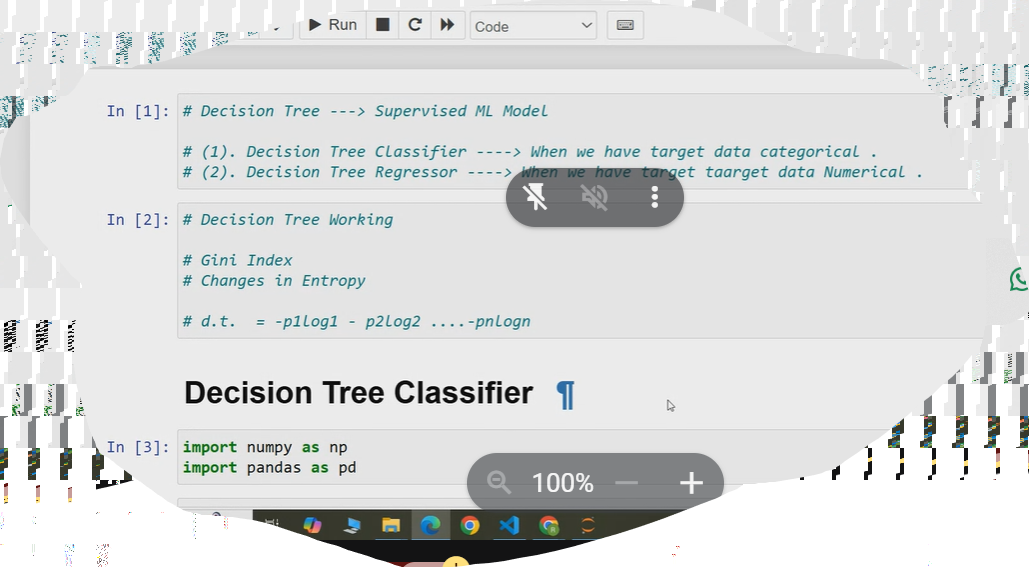

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv('Day028_Sample_data_covid_toy.csv')
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [4]:
df.isna().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()
df['fever']=si.fit_transform(df[['fever']])
df.isna().sum()


age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['gender']=lb.fit_transform(df['gender'])
df['cough']=lb.fit_transform(df['cough'])
df['city']=lb.fit_transform(df['city'])
df['has_covid']=lb.fit_transform(df['has_covid'])


In [8]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1


In [9]:
x=df.drop(columns=['has_covid'])
y=df['has_covid']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

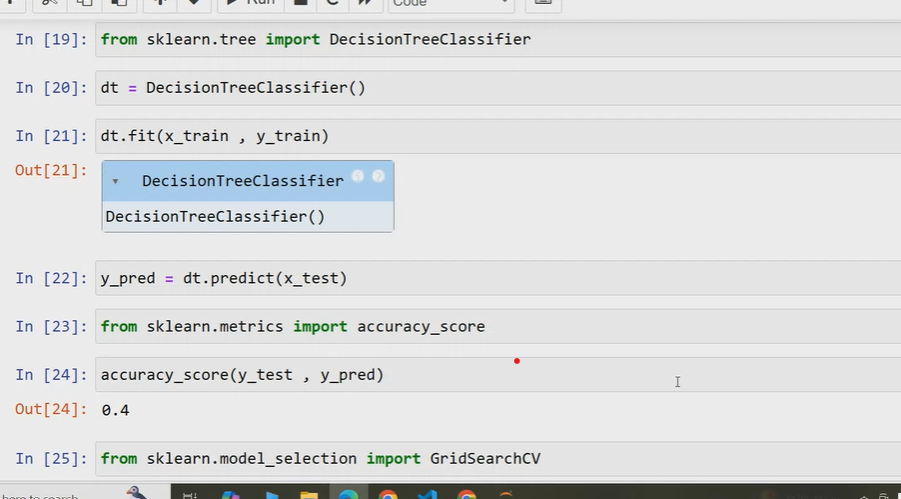

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=dt.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.45

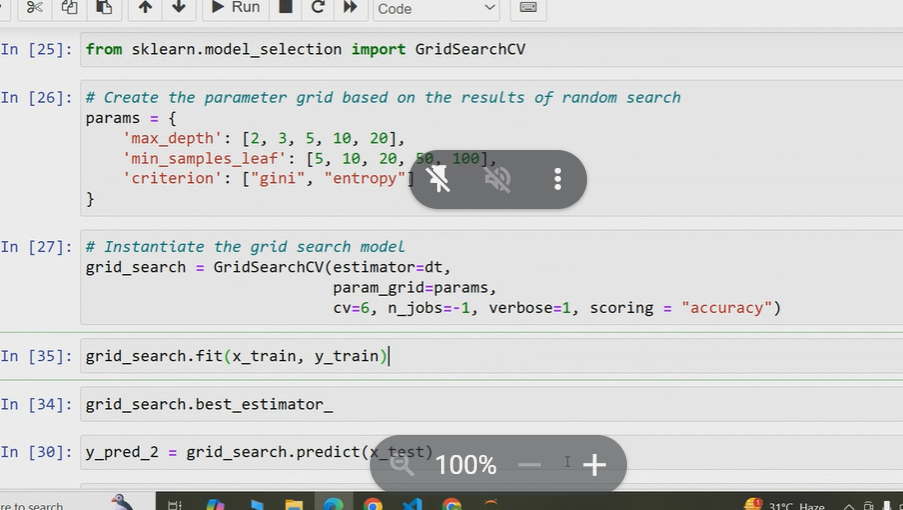

In [18]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the result of random search 
params= {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':['gini','entropy']
}
# Insstantiate the grid search model
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=6, n_jobs=-1 ,verbose=1, scoring='accuracy')
grid_search.fit(x_train,y_train)
print(grid_search.best_estimator_)
y_pred_2=grid_search.predict(x_test)  

Fitting 6 folds for each of 50 candidates, totalling 300 fits
DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_2)

0.65

In [20]:
df=pd.read_csv('Day045_Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])

In [23]:
x=df.drop(columns=['Purchased','User ID'])
y=df['Purchased']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=dt.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8625

In [29]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the result of random search 
params= {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':['gini','entropy']
}
# Insstantiate the grid search model
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=6, n_jobs=-1 ,verbose=1, scoring='accuracy')
grid_search.fit(x_train,y_train)
print(grid_search.best_estimator_)
y_pred_2=grid_search.predict(x_test)  

Fitting 6 folds for each of 50 candidates, totalling 300 fits
DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_2)

0.9

Classification metrics Score
 ->accuracy score, 
    confustion metrix (true+ ,true-,false +ve,fals -ve)
 Precision , recall, f1_score